<a href="https://colab.research.google.com/github/SPIDEY1876/imgclassification/blob/new/Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
import tensorflow as tf
import keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, Reshape, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(os.listdir("/content/drive/MyDrive/Term_Dataset"))

['val_data.csv', 'train_data.csv', 'val_data_emp.csv', 'train_data_emp.csv', 'val', 'train']


In [ ]:
print(len(os.listdir("/content/drive/MyDrive/Term_Dataset/train")))
print(len(os.listdir("/content/drive/MyDrive/Term_Dataset/val")))

864
133


In [ ]:
train = "/content/drive/MyDrive/Term_Dataset/train"
test = "/content/drive/MyDrive/Term_Dataset/val"
test_ds="/content/drive/MyDrive/Term_Test/test"
labels = pd.read_csv('/content/drive/MyDrive/Term_Dataset/train_data.csv')
labels_test=pd.read_csv('/content/drive/MyDrive/Term_Dataset/val_data.csv')
test_pd=pd.read_csv('/content/drive/MyDrive/Term_Test/test_data_emp.csv')

In [ ]:
test_pd['class']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
283   NaN
284   NaN
285   NaN
286   NaN
287   NaN
Name: class, Length: 288, dtype: float64

In [ ]:
labels_test['class'].unique()

array(['bag', 'bed', 'chair', 'coffeetable', 'cup', 'kitchentools',
       'lamp', 'laptop', 'LivingSofa', 'pot', 'shoe'], dtype=object)

In [ ]:
label_names=['bag', 'bed', 'chair', 'coffeetable', 'cup', 'kitchentools',
       'lamp', 'laptop', 'LivingSofa', 'pot', 'shoe']

In [ ]:
print(labels['class'].value_counts())

lamp            126
pot              90
shoe             90
bag              72
bed              72
chair            72
coffeetable      72
cup              72
kitchentools     72
LivingSofa       72
laptop           54
Name: class, dtype: int64


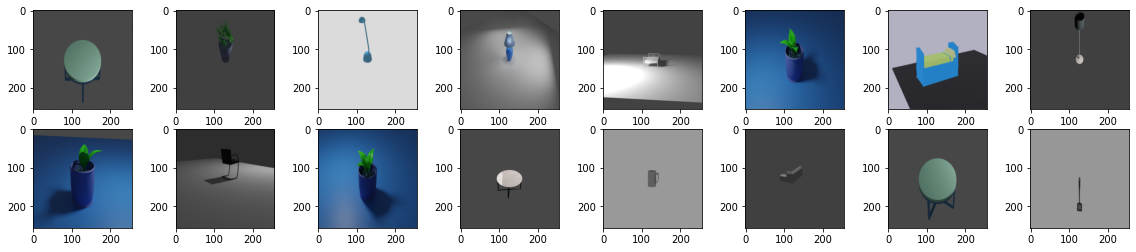

In [ ]:
rand_images = random.sample(os.listdir(train), 16)
test_iml=[]
fig = plt.figure(figsize=(20,4))
for i, im in enumerate(rand_images):
    plt.subplot(2, 8, i+1)
    im = cv2.imread(os.path.join(train, im),cv2.IMREAD_COLOR)
    im=cv2.resize(im,dsize=(256,256),interpolation=cv2.INTER_AREA)
    test_iml.append(im)
    plt.imshow(im)
  
plt.show()

In [ ]:
validation_split = 0.8
idxs = np.random.permutation(range(len(labels))) < validation_split*len(labels)

train_labels = labels[idxs]
val_labels = labels[~idxs]
print(len(train_labels), len(val_labels))

692 172


In [ ]:
train_labels

,Unnamed: 0,file_name,class
0,0,img00047.png,bag
1,1,img00053.png,bag
2,2,img00052.png,bag
3,3,img00046.png,bag
4,4,img00050.png,bag
...,...,...,...
859,859,img00908.png,shoe
860,860,img00922.png,shoe
861,861,img00936.png,shoe
862,862,img00937.png,shoe


In [ ]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255, horizontal_flip=True, 
                                                             rotation_range=5,
                                                             shear_range=0.2,
                                                             height_shift_range=0.2,
                                                             width_shift_range=0.2,
                                                             vertical_flip=True,
                                                            fill_mode='nearest')
batch_size = 32

train_generator = train_datagen.flow_from_dataframe(train_labels,directory=train,x_col='file_name',
                                                    y_col='class',class_mode='categorical',batch_size=batch_size,
                                                    target_size=(150,150))
val_generator = train_datagen.flow_from_dataframe(val_labels,directory=test_ds,x_col='file_name',
                                                    y_col='class',class_mode='categorical',batch_size=batch_size,
                                                    target_size=(150,150))

Found 692 validated image filenames belonging to 11 classes.
Found 65 validated image filenames belonging to 4 classes.


In [ ]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)

test_generator = test_datagen.flow_from_dataframe(labels_test,directory=test,x_col='file_name',
                                                    class_mode=None,batch_size=batch_size,
                                                    target_size=(150,150))

Found 133 validated image filenames.


In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=(150,150,3),include_top=False,weights="imagenet")

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers[:-10]:
    layer.trainable=False

In [ ]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 dropout (Dropout)           (None, 3, 3, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 11)                1419      
                                                                 
Total params: 24,180,139
Trainable params: 2,377,547
Non

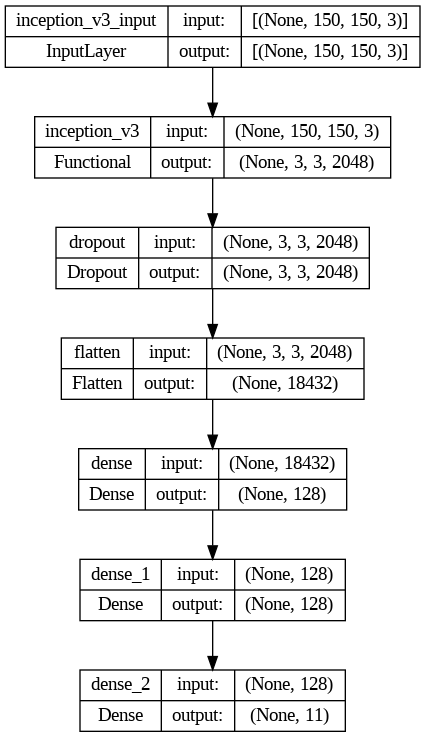

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [ ]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-6)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=3)

In [ ]:
model.compile(optimizer='Adam', loss = tf.keras.losses.CategoricalCrossentropy(),metrics=METRICS)

In [ ]:
%time
history=model.fit(train_generator,validation_data=val_generator,epochs = 10,verbose = 1,callbacks=[lrd,mcp,es])

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs
Epoch 1/10
22/22 [==============================] - 38s 1s/step - loss: 2.4554 - accuracy: 0.4234 - precision: 0.5385 - recall: 0.2327 - auc: 0.7593 - f1_score: 0.3162 - val_loss: 1.0616 - val_accuracy: 0.6860 - val_precision: 0.8317 - val_recall: 0.4884 - val_auc: 0.9492 - val_f1_score: 0.5978 - lr: 0.0010
Epoch 2/10
22/22 [==============================] - 26s 1s/step - loss: 0.6911 - accuracy: 0.8121 - precision: 0.9155 - recall: 0.6575 - auc: 0.9756 - f1_score: 0.7604 - val_loss: 0.6408 - val_accuracy: 0.8023 - val_precision: 0.8611 - val_recall: 0.7209 - val_auc: 0.9768 - val_f1_score: 0.7771 - lr: 0.0010
Epoch 3/10
22/22 [==============================] - 22s 1s/step - loss: 0.4028 - accuracy: 0.8844 - precision: 0.9510 - recall: 0.8136 - auc: 0.9908 - f1_score: 0.8722 - val_loss: 0.4028 - val_accuracy: 0.8721 - val_precision: 0.9133 - val_recall: 0.7965 - val_auc: 0.9927 - val_f1_score: 0.8546 - lr: 0.0010
Epoch 4/1

In [ ]:
pred=model.predict(test_generator)
pred_digits=np.argmax(pred,axis=1)

5/5 [==============================] - 27s 6s/step


In [ ]:
loop_length=len(pred)
loop_length

133

In [ ]:
for i in range(0,loop_length):
  idx=np.argmax(pred[i])
  test_pd['class'][i]=label_names[idx]

In [ ]:
test_pd

,Unnamed: 0,file_name,class
0,0,img00018.png,chair
1,1,img00024.png,kitchentools
2,2,img00019.png,kitchentools
3,3,img00022.png,coffeetable
4,4,img00023.png,cup
...,...,...,...
283,283,img00288.png,pot
284,284,img00261.png,pot
285,285,img00275.png,pot
286,286,img00274.png,pot


In [ ]:
test_pd.to_csv("/content/drive/MyDrive/Term_Dataset/result.csv")